# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## Odalys Barrionuevo
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Commento: </span>
<span style="color:green"> Nella seguente esercitazione viene eseguita una simulazione di un sistema microcanonico (NVE) con 108 particelle. Nel codice viene usato l'algoritmo di Verlet che permette la conservazione dell'energia. Si studiano le seguenti fasi: solido, liquido e gassoso. Dopo che i sistemi sono stati opportunatamente portati all'equilibrio vengono riportati i grafici della media progressiva in funzione del numero dei blocchi delle quantità: U/N, K/N. E/N, T e P con i rispettivi errori. I valori sono espressi in unità ridotte, per la conversione in unità del SI è necessario usare le seguenti spressioni:</span>

<span style="color:green"> $V = \epsilon V^*$; $K = \epsilon K^*$; $E = \epsilon E^*$; $T = \frac{\epsilon}{k_B} T^*$; $P = \frac{\epsilon}{\sigma^3} P^*$ </span>

<span style="color:green"> Per quanto rigurda l'equilibrazione, per il solido e il liquido possiamo considerare il sistema equilibrato dopo 750/800 passi Verlet, mentre per il gas 3000 passi Verlet.</span>

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

### <span style="color:green"> Risposta: </span>
<span style="color:green"> Nell'equilibrazione, per arrivare alle temperature desiderate, la simulazione è stata fatta partire a temperatura $T = 1.55$ per il solido, $T = 2.0$ per il liquido e $T = 1.04$ per il gas. Questo perchè se si parte da una configurazione perfettamente cristallina significa che il sistema si trova al minimo del potenziale. Nel momento in cui viene attribuito al sistema una certa temperatura, le particelle iniziano a vibrare tendendo ad avvicinarsi e allontanarsi. Per com'è fatto il potenziale (asimmetrico) quello che succede complessivamente è che l'energia potenziale aumenta e data la conservazione dell'energia totale questo porta conseguentemente all'abbassamento dell'energia cinetica, quindi della temperatura. Per quanto riguarda il gas invece, dato che ha una densità bassa e il numero di particelle rimane costante, nella simulazione le particelle sono più lontane tra di loro. Tenendo sempre in considerazione com'è fatto il potenziale queste risentiranno di una forza attrattiva (la derivata del potenziale per grandi r è negativa) e il loro potenziale quindi si abbasserà (tendono a cadere nella buca) con un conseguente aumento dell'energia cinetica, quindi della temperatura. Proprio per questi motivi per il solido e il liquido sono state scelte temperature più alte per l'equilibrazione e invece per il gas una temperatura più bassa. </span>

 ## <span style="color:green"> Solido: </span>

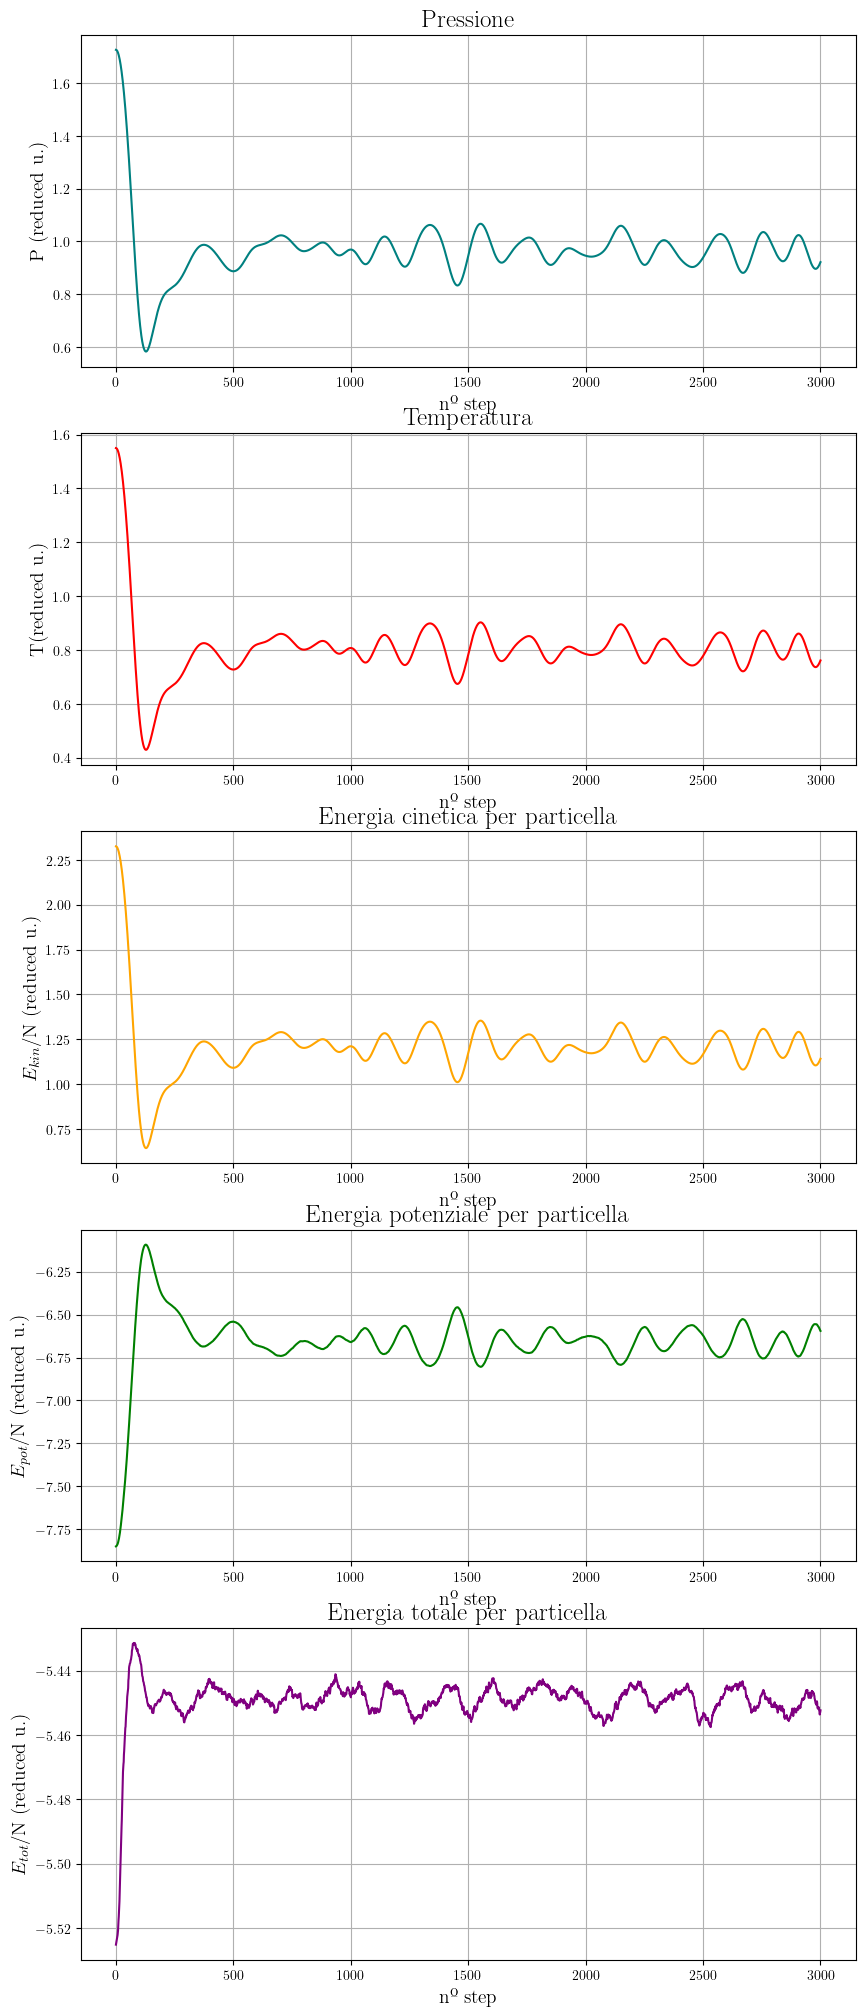

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axes = plt.subplots(5, 1, figsize=(10, 25))#creo 5 sottografici

E_kin = np.loadtxt("Lezione4/OUTPUT/kinetic_energyS.dat", usecols=(1), unpack='true' )
E_pot = np.loadtxt("Lezione4/OUTPUT/potential_energyS.dat", usecols=(1), unpack='true')
E_tot = np.loadtxt("Lezione4/OUTPUT/total_energyS.dat", usecols=(1), unpack='true')
temp = np.loadtxt("Lezione4/OUTPUT/temperatureS.dat", usecols=(1), unpack='true')
press = np.loadtxt("Lezione4/OUTPUT/pressureS.dat", usecols=(1), unpack='true')

M = 3000
N = 3000
L = 1
x = np.arange(N)+1

axes[0].plot(x, press, color = 'teal')
axes[0].set_title("Pressione", fontsize = 18)
axes[0].set_xlabel('nº step', fontsize = 14)
axes[0].set_ylabel('P (reduced u.)', fontsize = 14)
axes[0].grid(True)

axes[1].plot(x, temp, color = 'red')
axes[1].set_title("Temperatura", fontsize = 18)
axes[1].set_xlabel('nº step', fontsize = 14)
axes[1].set_ylabel('T(reduced u.)', fontsize = 14)
axes[1].grid(True)

axes[2].plot(x, E_kin, color = 'orange')
axes[2].set_title("Energia cinetica per particella", fontsize = 18)
axes[2].set_xlabel('nº step', fontsize = 14)
axes[2].set_ylabel('$E_{kin}$/N (reduced u.)', fontsize = 14)
axes[2].grid(True)

axes[3].plot(x, E_pot, color = 'green')
axes[3].set_title("Energia potenziale per particella", fontsize = 18)
axes[3].set_xlabel('nº step', fontsize = 14)
axes[3].set_ylabel('$E_{pot}$/N (reduced u.)', fontsize = 14)
axes[3].grid(True)

axes[4].plot(x, E_tot, color = 'purple')
axes[4].set_title("Energia totale per particella", fontsize = 18)
axes[4].set_xlabel('nº step', fontsize = 14)
axes[4].set_ylabel('$E_{tot}$/N (reduced u.)', fontsize = 14)
axes[4].grid(True)

plt.show()


 ## <span style="color:green"> Liquido: </span>

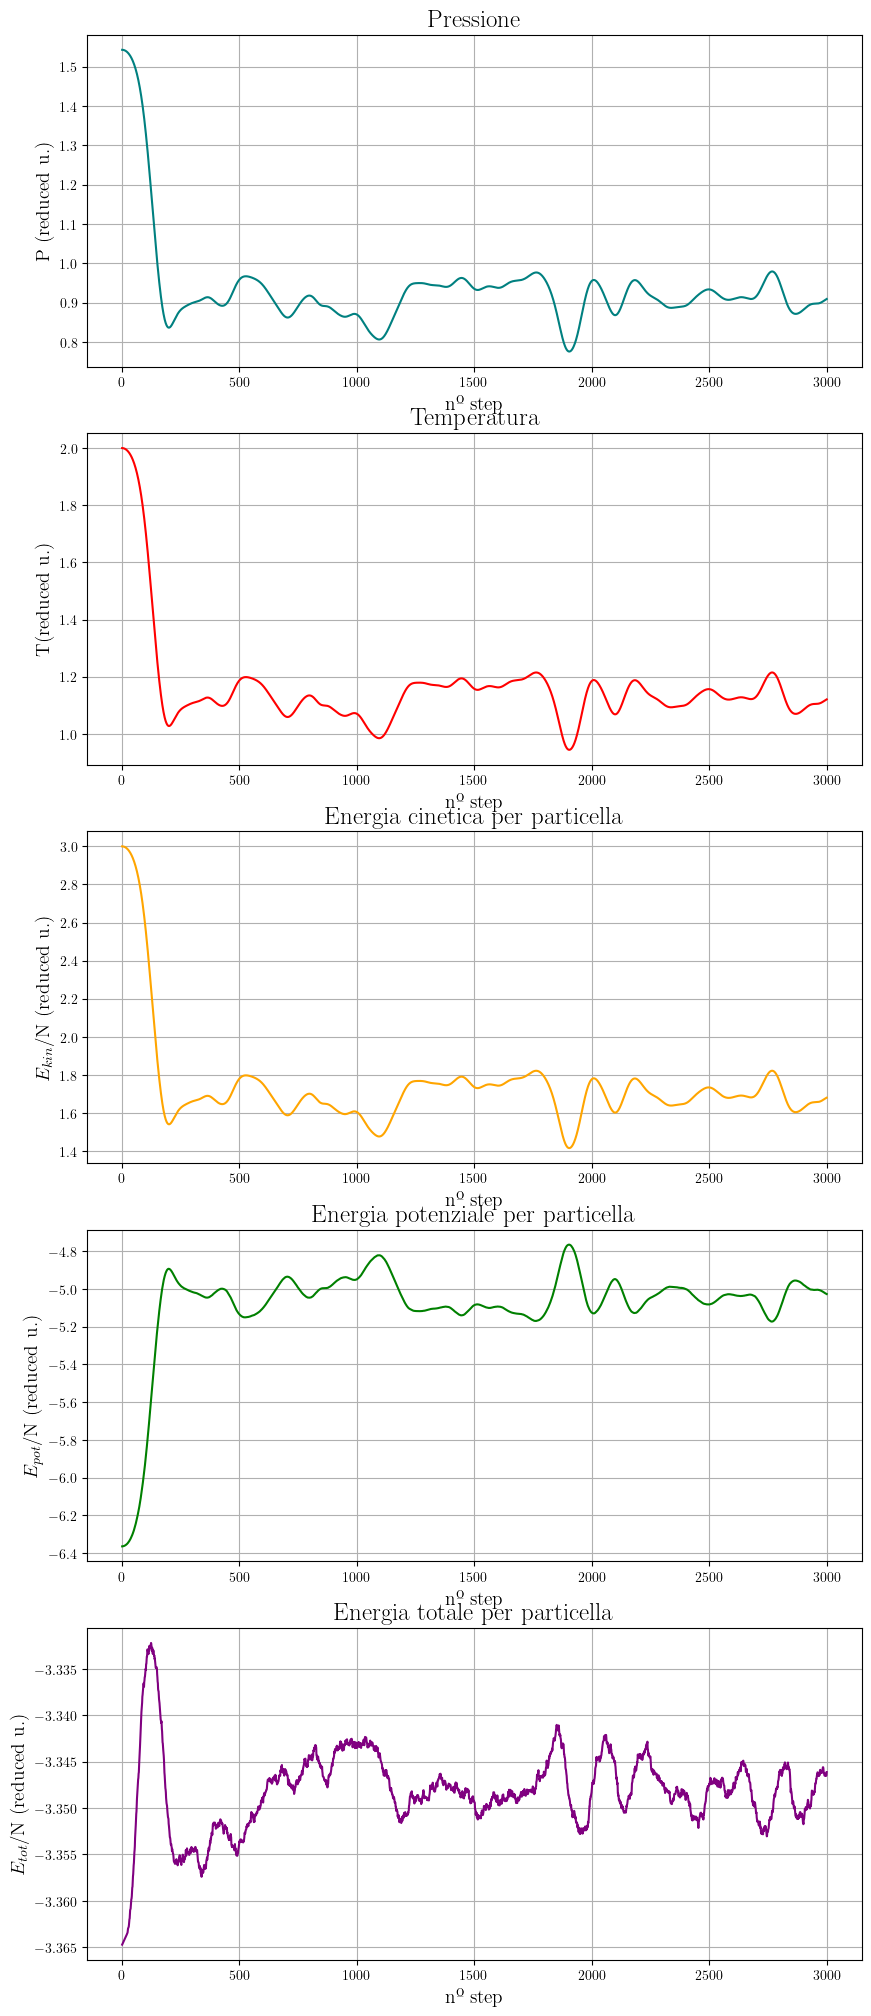

In [15]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

fig, axes = plt.subplots(5, 1, figsize=(10, 25))#creo 5 sottografici

E_kin = np.loadtxt("Lezione4/OUTPUT/kinetic_energyL.dat", usecols=(1), unpack='true' )
E_pot = np.loadtxt("Lezione4/OUTPUT/potential_energyL.dat", usecols=(1), unpack='true')
E_tot = np.loadtxt("Lezione4/OUTPUT/total_energyL.dat", usecols=(1), unpack='true')
temp = np.loadtxt("Lezione4/OUTPUT/temperatureL.dat", usecols=(1), unpack='true')
press = np.loadtxt("Lezione4/OUTPUT/pressureL.dat", usecols=(1), unpack='true')

M = 3000
N = 3000
L = 1
x = np.arange(N)+1

axes[0].plot(x, press, color = 'teal')
axes[0].set_title("Pressione", fontsize = 18)
axes[0].set_xlabel('nº step', fontsize = 14)
axes[0].set_ylabel('P (reduced u.)', fontsize = 14)
axes[0].grid(True)

axes[1].plot(x, temp, color = 'red')
axes[1].set_title("Temperatura", fontsize = 18)
axes[1].set_xlabel('nº step', fontsize = 14)
axes[1].set_ylabel('T(reduced u.)', fontsize = 14)
axes[1].grid(True)

axes[2].plot(x, E_kin, color = 'orange')
axes[2].set_title("Energia cinetica per particella", fontsize = 18)
axes[2].set_xlabel('nº step', fontsize = 14)
axes[2].set_ylabel('$E_{kin}$/N (reduced u.)', fontsize = 14)
axes[2].grid(True)

axes[3].plot(x, E_pot, color = 'green')
axes[3].set_title("Energia potenziale per particella", fontsize = 18)
axes[3].set_xlabel('nº step', fontsize = 14)
axes[3].set_ylabel('$E_{pot}$/N (reduced u.)', fontsize = 14)
axes[3].grid(True)

axes[4].plot(x, E_tot, color = 'purple')
axes[4].set_title("Energia totale per particella", fontsize = 18)
axes[4].set_xlabel('nº step', fontsize = 14)
axes[4].set_ylabel('$E_{tot}$/N (reduced u.)', fontsize = 14)
axes[4].grid(True)

plt.show()


## <span style="color:green"> Gas: </span>

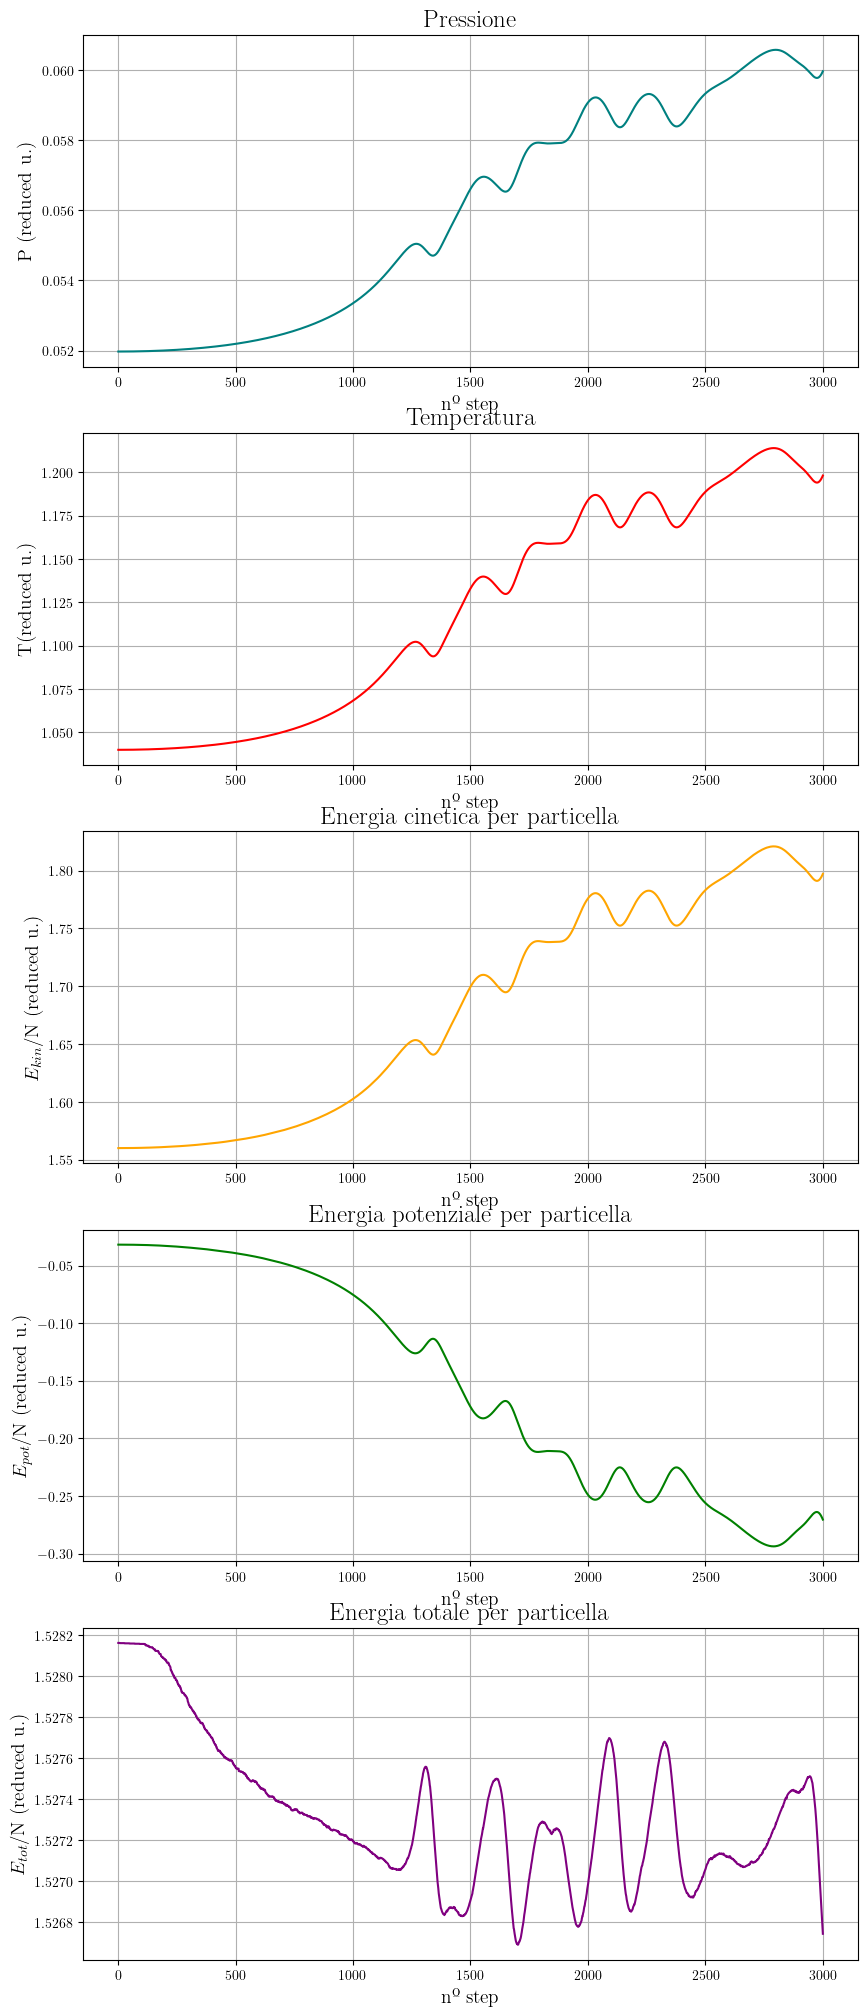

In [23]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

fig, axes = plt.subplots(5, 1, figsize=(10, 25))#creo 5 sottografici

E_kin = np.loadtxt("Lezione4/OUTPUT/kinetic_energyG.dat", usecols=(1), unpack='true' )
E_pot = np.loadtxt("Lezione4/OUTPUT/potential_energyG.dat", usecols=(1), unpack='true')
E_tot = np.loadtxt("Lezione4/OUTPUT/total_energyG.dat", usecols=(1), unpack='true')
temp = np.loadtxt("Lezione4/OUTPUT/temperatureG.dat", usecols=(1), unpack='true')
press = np.loadtxt("Lezione4/OUTPUT/pressureG.dat", usecols=(1), unpack='true')

M = 3000
N = 3000
L = 1
x = np.arange(N)+1

axes[0].plot(x, press, color = 'teal')
axes[0].set_title("Pressione", fontsize = 18)
axes[0].set_xlabel('nº step', fontsize = 14)
axes[0].set_ylabel('P (reduced u.)', fontsize = 14)
axes[0].grid(True)

axes[1].plot(x, temp, color = 'red')
axes[1].set_title("Temperatura", fontsize = 18)
axes[1].set_xlabel('nº step', fontsize = 14)
axes[1].set_ylabel('T(reduced u.)', fontsize = 14)
axes[1].grid(True)

axes[2].plot(x, E_kin, color = 'orange')
axes[2].set_title("Energia cinetica per particella", fontsize = 18)
axes[2].set_xlabel('nº step', fontsize = 14)
axes[2].set_ylabel('$E_{kin}$/N (reduced u.)', fontsize = 14)
axes[2].grid(True)

axes[3].plot(x, E_pot, color = 'green')
axes[3].set_title("Energia potenziale per particella", fontsize = 18)
axes[3].set_xlabel('nº step', fontsize = 14)
axes[3].set_ylabel('$E_{pot}$/N (reduced u.)', fontsize = 14)
axes[3].grid(True)

axes[4].plot(x, E_tot, color = 'purple')
axes[4].set_title("Energia totale per particella", fontsize = 18)
axes[4].set_xlabel('nº step', fontsize = 14)
axes[4].set_ylabel('$E_{tot}$/N (reduced u.)', fontsize = 14)
axes[4].grid(True)

plt.show()


## <span style="color:green"> Solido post equilibrio: </span>

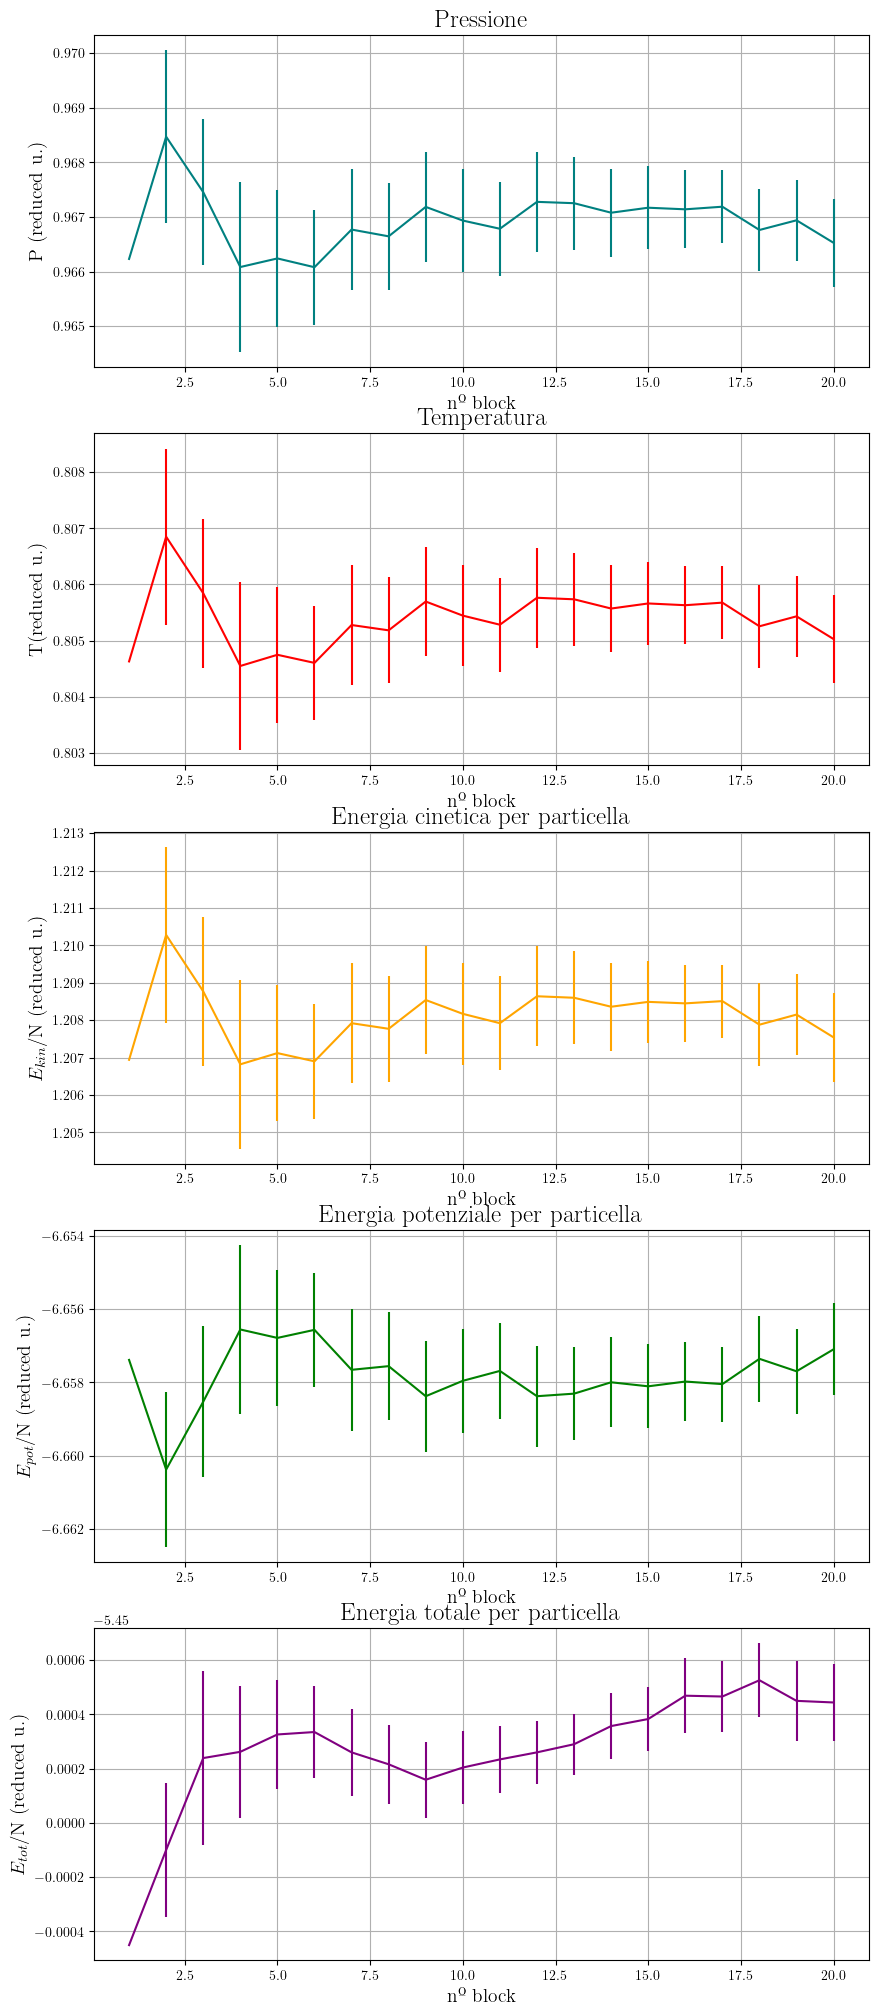

In [25]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

fig, axes = plt.subplots(5, 1, figsize=(10, 25))#creo 5 sottografici

E_kin, err_kin = np.loadtxt("Lezione4/OUTPUT/kinetic_energyES.dat", usecols=(2, 3), unpack='true' )
E_pot, err_pot = np.loadtxt("Lezione4/OUTPUT/potential_energyES.dat", usecols=(2, 3), unpack='true')
E_tot, err_tot = np.loadtxt("Lezione4/OUTPUT/total_energyES.dat", usecols=(2, 3), unpack='true')
temp, err_temp = np.loadtxt("Lezione4/OUTPUT/temperatureES.dat", usecols=(2, 3), unpack='true')
press, err_press = np.loadtxt("Lezione4/OUTPUT/pressureES.dat", usecols=(2, 3), unpack='true')

M = 20*1000
N = 20
L = 1000
x = np.arange(N)+1

axes[0].errorbar(x, press, yerr=err_press, color = 'teal')
axes[0].set_title("Pressione", fontsize = 18)
axes[0].set_xlabel('nº block', fontsize = 14)
axes[0].set_ylabel('P (reduced u.)', fontsize = 14)
axes[0].grid(True)

axes[1].errorbar(x, temp, yerr=err_temp, color = 'red')
axes[1].set_title("Temperatura", fontsize = 18)
axes[1].set_xlabel('nº block', fontsize = 14)
axes[1].set_ylabel('T(reduced u.)', fontsize = 14)
axes[1].grid(True)

axes[2].errorbar(x, E_kin, yerr=err_kin, color = 'orange')
axes[2].set_title("Energia cinetica per particella", fontsize = 18)
axes[2].set_xlabel('nº block', fontsize = 14)
axes[2].set_ylabel('$E_{kin}$/N (reduced u.)', fontsize = 14)
axes[2].grid(True)

axes[3].errorbar(x, E_pot, yerr=err_pot, color = 'green')
axes[3].set_title("Energia potenziale per particella", fontsize = 18)
axes[3].set_xlabel('nº block', fontsize = 14)
axes[3].set_ylabel('$E_{pot}$/N (reduced u.)', fontsize = 14)
axes[3].grid(True)

axes[4].errorbar(x, E_tot, yerr=err_tot, color = 'purple')
axes[4].set_title("Energia totale per particella", fontsize = 18)
axes[4].set_xlabel('nº block', fontsize = 14)
axes[4].set_ylabel('$E_{tot}$/N (reduced u.)', fontsize = 14)
axes[4].grid(True)

plt.show()


## <span style="color:green"> Liquido post equilibrio: </span>

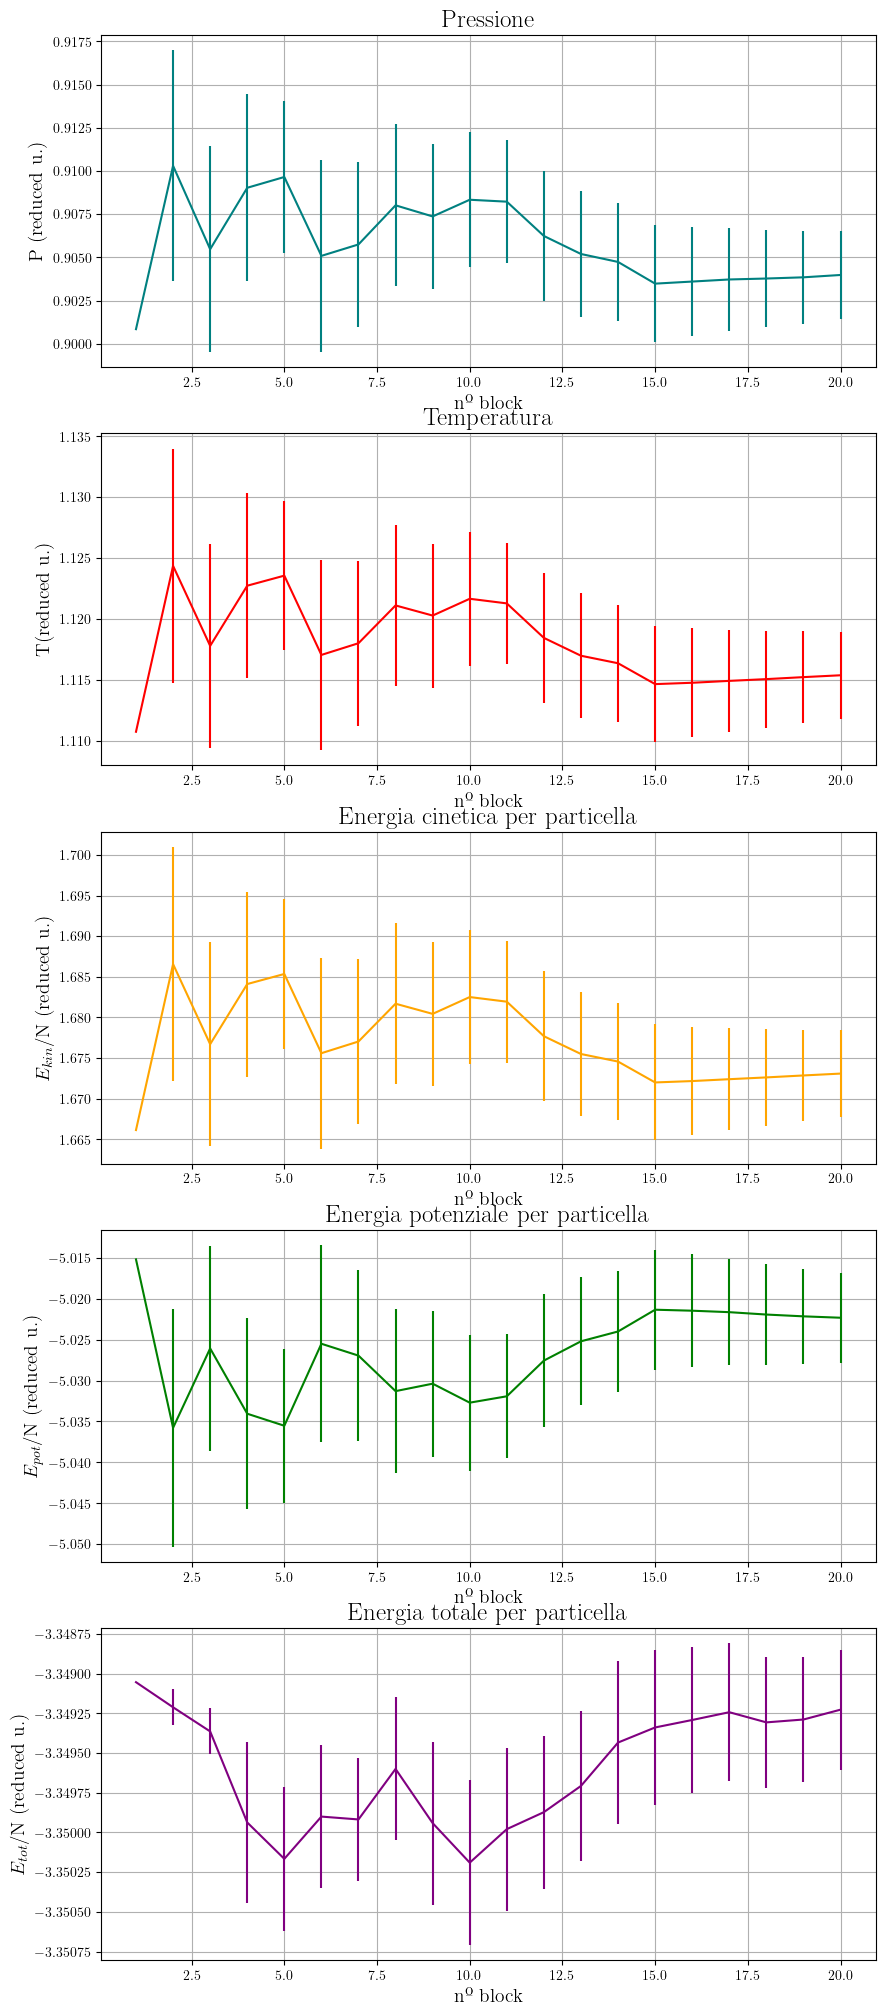

In [26]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

fig, axes = plt.subplots(5, 1, figsize=(10, 25))#creo 5 sottografici

E_kin, err_kin = np.loadtxt("Lezione4/OUTPUT/kinetic_energyEL.dat", usecols=(2, 3), unpack='true' )
E_pot, err_pot = np.loadtxt("Lezione4/OUTPUT/potential_energyEL.dat", usecols=(2, 3), unpack='true')
E_tot, err_tot = np.loadtxt("Lezione4/OUTPUT/total_energyEL.dat", usecols=(2, 3), unpack='true')
temp, err_temp = np.loadtxt("Lezione4/OUTPUT/temperatureEL.dat", usecols=(2, 3), unpack='true')
press, err_press = np.loadtxt("Lezione4/OUTPUT/pressureEL.dat", usecols=(2, 3), unpack='true')

M = 20*1000
N = 20
L = 1000
x = np.arange(N)+1

axes[0].errorbar(x, press, yerr=err_press, color = 'teal')
axes[0].set_title("Pressione", fontsize = 18)
axes[0].set_xlabel('nº block', fontsize = 14)
axes[0].set_ylabel('P (reduced u.)', fontsize = 14)
axes[0].grid(True)

axes[1].errorbar(x, temp, yerr=err_temp, color = 'red')
axes[1].set_title("Temperatura", fontsize = 18)
axes[1].set_xlabel('nº block', fontsize = 14)
axes[1].set_ylabel('T(reduced u.)', fontsize = 14)
axes[1].grid(True)

axes[2].errorbar(x, E_kin, yerr=err_kin, color = 'orange')
axes[2].set_title("Energia cinetica per particella", fontsize = 18)
axes[2].set_xlabel('nº block', fontsize = 14)
axes[2].set_ylabel('$E_{kin}$/N (reduced u.)', fontsize = 14)
axes[2].grid(True)

axes[3].errorbar(x, E_pot, yerr=err_pot, color = 'green')
axes[3].set_title("Energia potenziale per particella", fontsize = 18)
axes[3].set_xlabel('nº block', fontsize = 14)
axes[3].set_ylabel('$E_{pot}$/N (reduced u.)', fontsize = 14)
axes[3].grid(True)

axes[4].errorbar(x, E_tot, yerr=err_tot, color = 'purple')
axes[4].set_title("Energia totale per particella", fontsize = 18)
axes[4].set_xlabel('nº block', fontsize = 14)
axes[4].set_ylabel('$E_{tot}$/N (reduced u.)', fontsize = 14)
axes[4].grid(True)

plt.show()


## <span style="color:green"> Gas post equilibrio: </span>

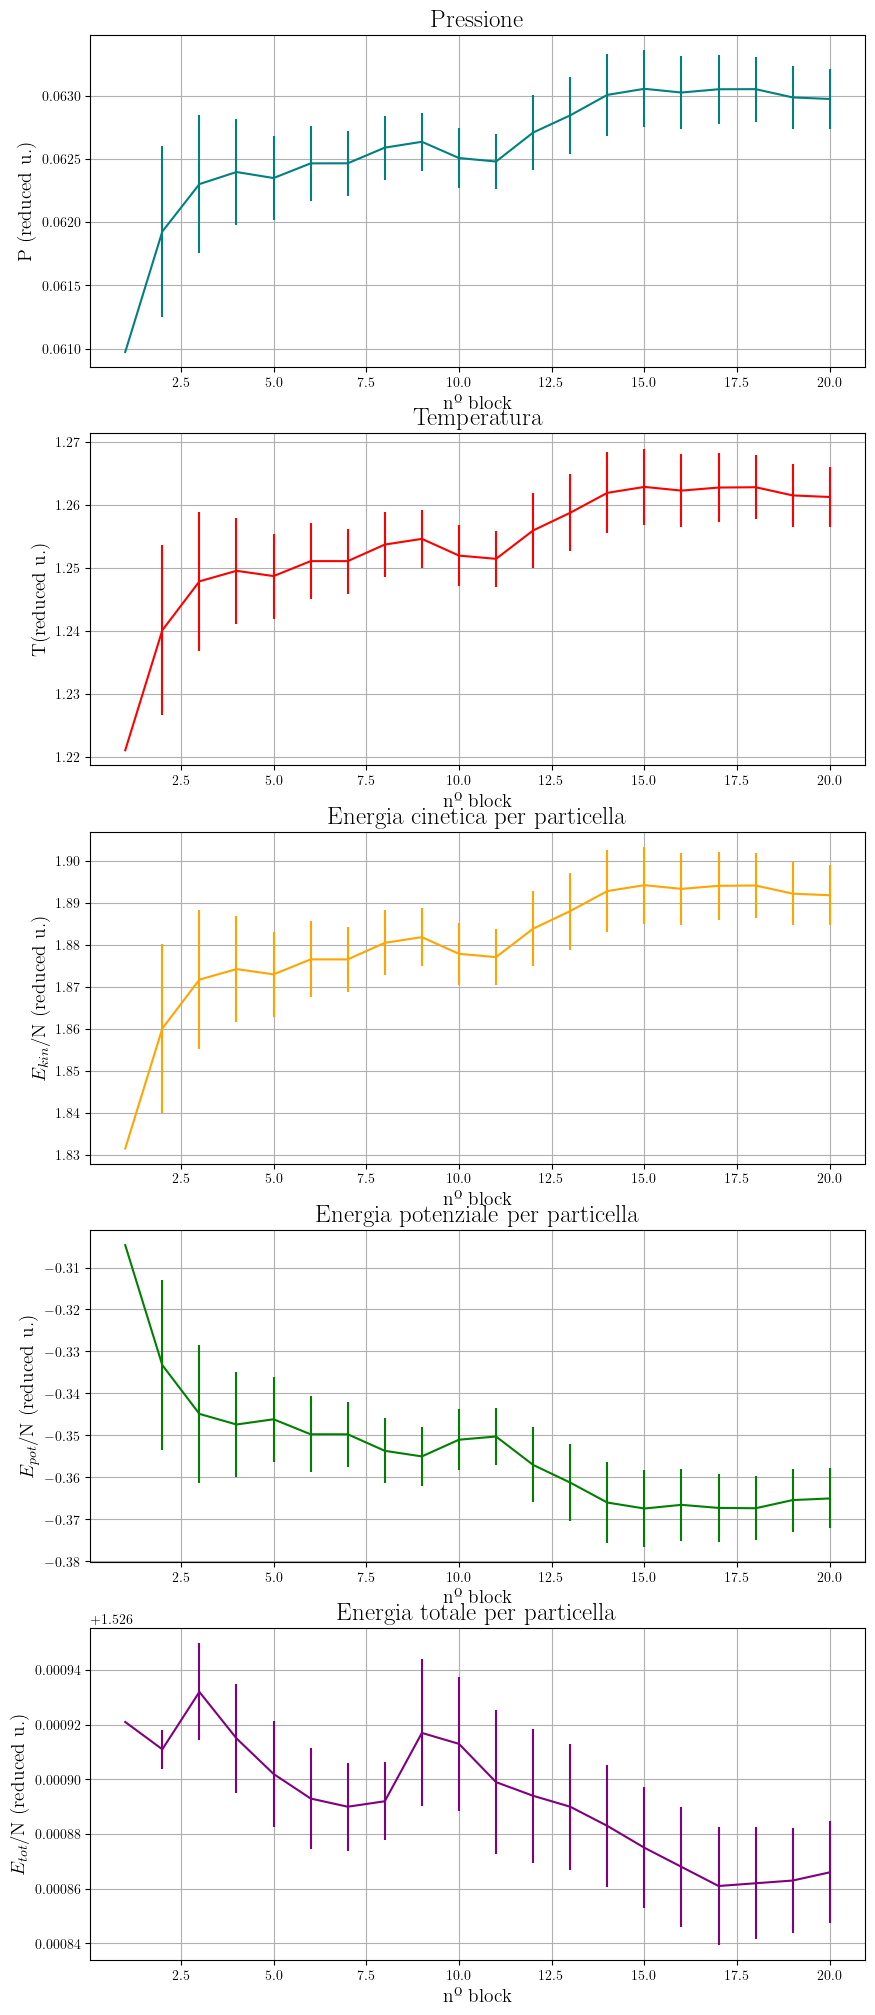

In [28]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

fig, axes = plt.subplots(5, 1, figsize=(10, 25))#creo 5 sottografici

E_kin, err_kin = np.loadtxt("Lezione4/OUTPUT/kinetic_energyEG.dat", usecols=(2, 3), unpack='true' )
E_pot, err_pot = np.loadtxt("Lezione4/OUTPUT/potential_energyEG.dat", usecols=(2, 3), unpack='true')
E_tot, err_tot = np.loadtxt("Lezione4/OUTPUT/total_energyEG.dat", usecols=(2, 3), unpack='true')
temp, err_temp = np.loadtxt("Lezione4/OUTPUT/temperatureEG.dat", usecols=(2, 3), unpack='true')
press, err_press = np.loadtxt("Lezione4/OUTPUT/pressureEG.dat", usecols=(2, 3), unpack='true')

M = 20*1000
N = 20
L = 1000
x = np.arange(N)+1

axes[0].errorbar(x, press, yerr=err_press, color = 'teal')
axes[0].set_title("Pressione", fontsize = 18)
axes[0].set_xlabel('nº block', fontsize = 14)
axes[0].set_ylabel('P (reduced u.)', fontsize = 14)
axes[0].grid(True)

axes[1].errorbar(x, temp, yerr=err_temp, color = 'red')
axes[1].set_title("Temperatura", fontsize = 18)
axes[1].set_xlabel('nº block', fontsize = 14)
axes[1].set_ylabel('T(reduced u.)', fontsize = 14)
axes[1].grid(True)

axes[2].errorbar(x, E_kin, yerr=err_kin, color = 'orange')
axes[2].set_title("Energia cinetica per particella", fontsize = 18)
axes[2].set_xlabel('nº block', fontsize = 14)
axes[2].set_ylabel('$E_{kin}$/N (reduced u.)', fontsize = 14)
axes[2].grid(True)

axes[3].errorbar(x, E_pot, yerr=err_pot, color = 'green')
axes[3].set_title("Energia potenziale per particella", fontsize = 18)
axes[3].set_xlabel('nº block', fontsize = 14)
axes[3].set_ylabel('$E_{pot}$/N (reduced u.)', fontsize = 14)
axes[3].grid(True)

axes[4].errorbar(x, E_tot, yerr=err_tot, color = 'purple')
axes[4].set_title("Energia totale per particella", fontsize = 18)
axes[4].set_xlabel('nº block', fontsize = 14)
axes[4].set_ylabel('$E_{tot}$/N (reduced u.)', fontsize = 14)
axes[4].grid(True)

plt.show()
